In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("beam_res_2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   wmax      100000 non-null  float64
 1   rf_t_uf   100000 non-null  float64
 2   rf_t_lf   100000 non-null  float64
 3   rf_c_uf   100000 non-null  float64
 4   rf_c_lf   100000 non-null  float64
 5   rf_lb_uf  100000 non-null  float64
 6   rf_lb_lf  100000 non-null  float64
 7   rf_s_web  100000 non-null  float64
 8   rf_wb     100000 non-null  float64
 9   rf_lat    100000 non-null  float64
 10  Fmax      100000 non-null  int64  
 11  mass      100000 non-null  float64
 12  cost      100000 non-null  float64
 13  area      100000 non-null  float64
 14  L         100000 non-null  int64  
 15  h         100000 non-null  float64
 16  tw        100000 non-null  float64
 17  blf       100000 non-null  float64
 18  tlf       100000 non-null  float64
 19  buf       100000 non-null  float64
 20  tuf  

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wmax,100000.0,2.444583e+03,12647.896552,5.037907e+00,35.551336,93.778806,447.729995,5.779606e+05
rf_t_uf,100000.0,1.854895e+00,1.806556,2.665973e-03,0.514190,1.338082,2.616949,1.503611e+01
rf_t_lf,100000.0,3.085692e+00,3.001143,4.233632e-03,0.861115,2.236614,4.357569,2.675129e+01
rf_c_uf,100000.0,inf,NaN,4.240785e-03,1.031980,2.348863,4.483127,inf
rf_c_lf,100000.0,inf,NaN,2.183806e-03,0.617057,1.413125,2.684441,inf
rf_lb_uf,100000.0,inf,NaN,2.714324e-10,0.969214,6.864537,29.896688,inf
rf_lb_lf,100000.0,1.526366e+02,8481.948356,2.537639e-11,0.596755,4.176279,18.028980,1.790955e+06
rf_s_web,100000.0,1.293305e+01,10.378731,1.421471e-05,5.083336,10.496568,18.181710,6.050132e+01
rf_wb,100000.0,inf,NaN,5.665812e-02,1.295656,3.295748,7.447405,inf
rf_lat,100000.0,1.555223e+00,1.546918,1.027380e-03,0.410162,1.078141,2.206763,1.566122e+01


In [4]:
df['rfmin'] = df.filter(regex="^rf_").min(axis=1)
dfok = df.query("rfmin >= 1")
print(len(dfok))

30554


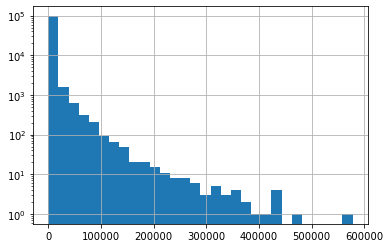

In [6]:
df.wmax.hist(bins=30, log=True);

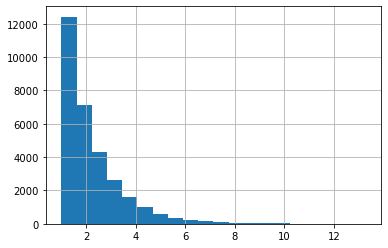

In [7]:
dfok.filter(regex="^rf_").min(axis=1).hist(bins=20);

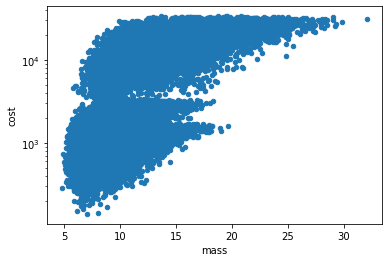

In [8]:
dfok.plot(x='mass', y='cost', kind='scatter', logy=True);

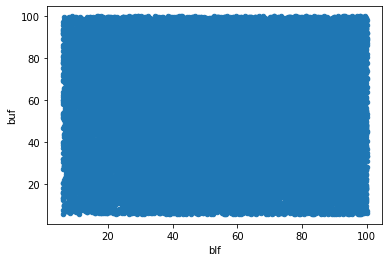

In [9]:
dfok.plot(x='blf', y='buf', kind='scatter');

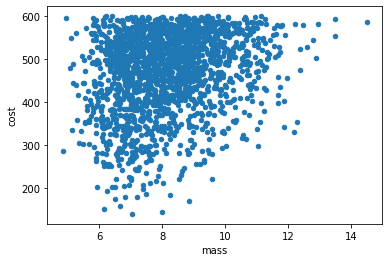

In [10]:
dfx = dfok.query("mass < 15 and cost < 600")
dfx.plot(x='mass', y='cost', kind='scatter');

In [11]:
dfok.sort_values("mass").head(10).round(2).T

,78022,92755,92260,21588,53895,58381,23608,37430,6329,75087
wmax,85.51,62.82,80,88.62,79.41,113.82,70.18,85.11,56.19,84.67
rf_t_uf,1.1,1.04,1.29,1.2,1.24,1,1.17,1.12,1.31,1.24
rf_t_lf,2.07,2.37,1.98,2.15,2.25,2.16,2.51,2.4,2.23,2.08
rf_c_uf,1.73,1.58,2.07,1.89,1.86,1.65,1.77,1.73,2,2.01
rf_c_lf,1.19,1.31,1.1,1.23,1.32,1.21,1.37,1.43,1.24,1.13
rf_lb_uf,214.1,2594,95.54,40.32,6.97,137.48,75,52.98,333.47,206.23
rf_lb_lf,73.37,54.34,34.96,23.06,85.88,2.62,7.71,55.18,293.37,6.03
rf_s_web,9.42,11.34,7.12,5.6,8.82,6.65,8.49,8.16,11.89,9.66
rf_wb,1.01,1.02,1.12,1.16,1.01,1.43,1.29,1.2,1.03,1.19
rf_lat,1.15,1.18,1.38,1.32,1.16,1,1.07,1.29,1.41,1.12


In [12]:
dfok.query("mass < 5.5 and cost < 300").T

,78022
wmax,85.5145
rf_t_uf,1.09804
rf_t_lf,2.07043
rf_c_uf,1.73356
rf_c_lf,1.19427
rf_lb_uf,214.097
rf_lb_lf,73.3651
rf_s_web,9.41959
rf_wb,1.01425
rf_lat,1.14657
